# Naive Bayees Project
## Table of contents

* [0. Problem Statement](#co)
* [1. Importing libraries](#c1)
* [2. Data Collection](#c2)
* [3. Exploration and Data Cleaning](#c3)
  * [3.1 Drop Null Values](#c3-1)
  * [3.1 Drop Duplicate Information](#c3-2)
  * [3.2 Drop Irrelevant Information](#c3-3)
* [4. Univariate Analysis](#c4)
  * [4.1 Categorical Variable Analysis](#c4-1)
* [5. Encoding Categorical Values and Saving JSON Files](#c5)
* [6. Prepare Data for Naive Bayees](#c6)
  * [6.1 Split train/test of both Data Frames](#c6-1)
  * [6.2 Transform Data](#c6-2)
* [7. Machine Learning](#c4)

## 0. Problem Statement <a id='c0'></a>

The objective of this exercise is to conduct an in-depth EDA analysis and develop a predictive naive-bayees model to classify reviews of Google Play.

## 1. Importing libraries <a id='c1'></a>

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
import warnings
from pickle import dump
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

## 2. Data Collection <a id='c2'></a>

In [79]:
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv'

def get_data(URL:str) -> pd.DataFrame:
    total_data = pd.read_csv(URL, sep=',')
    total_data.head()
    return total_data

get_data(URL)
total_data = get_data(URL)
total_data["review"] = total_data["review"].str.strip().str.lower()
total_data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offlin...,0
1,com.facebook.katana,"messenger issues ever since the last update, i...",0
2,com.facebook.katana,profile any time my wife or anybody has more t...,0
3,com.facebook.katana,the new features suck for those of us who don'...,0
4,com.facebook.katana,forced reload on uploading pic on replying com...,0


## 3. Exploration and Data Cleaning <a id='c3'></a>

#### 3.1 Drop Null Values <a id='c3-1'></a>

In [80]:
total_data.isna().sum()

package_name    0
review          0
polarity        0
dtype: int64

#### 3.2 Drop Duplicate Information <a id='c3-2'></a>

In [81]:
rows = total_data.shape[0]
duplicated_rows = total_data.duplicated().sum()
print(f'We have {duplicated_rows} of {rows} rows duplicated')
total_data.drop_duplicates(inplace=True)

We have 1 of 891 rows duplicated


#### 3.3 Drop Irrelevant Information <a id='c3-3'></a>

Since we don't need package_name for this exercise we'll delete it.

In [82]:
total_data.drop('package_name', axis=1)

,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0
...,...,...
886,loved it i loooooooooooooovvved it because it ...,1
887,all time legendary game the birthday party lev...,1
888,ads are way to heavy listen to the bad reviews...,0
889,fun works perfectly well. ads aren't as annoyi...,1


## 4. Univariate Analysis <a id='c4'></a>

### 4.1 Categorical Variable Analysis <a id='c4-1'></a>

Since `review` is text data, it's not a categorical variable.

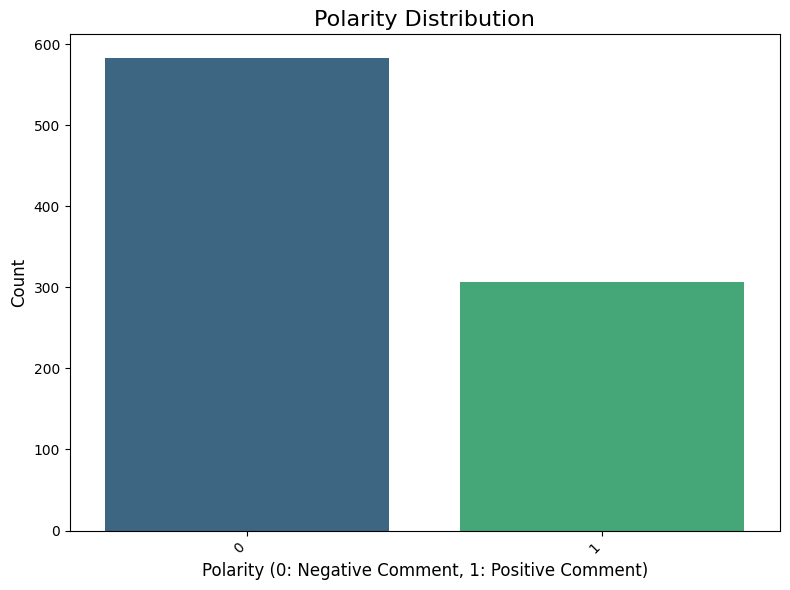

In [83]:
# --- 'Outcome Plot' ---
plt.figure(figsize=(8, 6))
sns.countplot(data=total_data, x="polarity", palette='viridis')
plt.title("Polarity Distribution", fontsize=16)
plt.xlabel("Polarity (0: Negative Comment, 1: Positive Comment)", fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

**Conclusions:**

- **Polarity**: There is nearly a half negative comments than postive comments.

### 5 Encoding Categorical Values and Saving JSON Files <a id='c5'></a>

In [84]:
mapping = {0: 'negative', 1: 'positive'}

total_data_factorized = total_data.copy()
total_data_factorized['polarity'] = total_data_factorized['polarity'].map(mapping)

output_dir = os.path.join('factorize_data')
os.makedirs(output_dir, exist_ok=True)

json_file_path = os.path.join(output_dir, "factorized_polarity.json")
with open(json_file_path, "w") as f:
    json.dump(mapping, f, indent=4)

print(total_data_factorized.head())

          package_name                                             review  \
0  com.facebook.katana  privacy at least put some option appear offlin...   
1  com.facebook.katana  messenger issues ever since the last update, i...   
2  com.facebook.katana  profile any time my wife or anybody has more t...   
3  com.facebook.katana  the new features suck for those of us who don'...   
4  com.facebook.katana  forced reload on uploading pic on replying com...   

   polarity  
0  negative  
1  negative  
2  negative  
3  negative  
4  negative  


## 6 Prepare Data for Naive Bayees <a id='c6'></a>

### 6.1 Split train/test of both Data Frames <a id='c6-1'></a>

A crucial step in data preparation is splitting the dataset into training (train) and testing (test) sets. This is vital for two main reasons:

- **Prevent Overfitting**: It ensures the model learns generalizable patterns from the train set rather than simply memorizing noise or specific training examples.

- **Evaluate Generalization**: By assessing performance on the unseen test set, we gain a realistic estimate of how well the model will perform on new, real-world data.

In [85]:
X = total_data['review']
y = total_data['polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6.2 Transform Data  <a id='c6-2'></a>

In [86]:
vec_model = CountVectorizer(stop_words = "english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

## 7. Machine Learning <a id='c7'></a>